# Correlation analysis
This Jupyter notebook can be used to analyze the measured data and calculate the correlation coefficients.<br>
**Input:** Pruning and inference data as CSV. The inference data can be generated by using trace_analysis.jpynb.<br>
**Output:** Complete dataset that contains pruning and inference information + correlation table.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read input data

In [60]:
path_unstructured_pruning_training_data = "../../../src/mnist/train/models/unstructured_pruning/pruning.csv"
path_unstructured_pruning_speedup_training_data = "../../../src/mnist/train/models/unstructured_pruning/pruning.csv"
path_structured_pruning_training_data = "../../../src/mnist/train/models/structured_pruning/pruning.csv"
path_unstructured_pruning_inference_data = "../../../src/mnist/train/models/unstructured_pruning/inference.csv"
path_unstructured_pruning_speedup_inference_data = "../../../src/mnist/train/models/unstructured_pruning/inference_speedup.csv"
path_structured_pruning_inference_data = "../../../src/mnist/train/models/structured_pruning/inference.csv"

In [61]:
df_unstructured_pruning_training = pd.read_csv(path_unstructured_pruning_training_data, sep=';')
df_unstructured_pruning_speedup_training = pd.read_csv(path_unstructured_pruning_speedup_training_data, sep=';')
df_structured_pruning_training = pd.read_csv(path_structured_pruning_training_data, sep=';')
df_unstructured_pruning_inference = pd.read_csv(path_unstructured_pruning_inference_data, sep=';')
df_unstructured_pruning_speedup_inference = pd.read_csv(path_unstructured_pruning_speedup_inference_data, sep=';')
df_structured_pruning_inference = pd.read_csv(path_structured_pruning_inference_data, sep=';')

## Merge training and inference data

In [62]:
df_unstructured_pruning = pd.concat([df_unstructured_pruning_training, df_unstructured_pruning_inference[["energyJoule", "duration", "energyJouleStd", "durationStd"]]], axis=1)
df_unstructured_pruning_speedup = pd.concat([df_unstructured_pruning_speedup_training, df_unstructured_pruning_speedup_inference[["energyJoule", "duration", "energyJouleStd", "durationStd"]]], axis=1)
df_structured_pruning = pd.concat([df_structured_pruning_training, df_structured_pruning_inference[["energyJoule", "duration", "energyJouleStd", "durationStd"]]], axis=1)

In [55]:
def save_as_tex(df, path):
    df_latex = df[["CRPercent", "accuracy", "size", "parameters", "duration", "energyJoule"]].copy()
    df_latex.loc[:,'CRPercent'] *= 100
    df_latex.loc[:,'accuracy'] *= 100
    df_latex["duration"] = df_latex["duration"].apply(lambda x: str(int(x * 1000))) + " ($\sigma$=" + df["durationStd"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + ")"
    df_latex["energyJoule"] = df_latex["energyJoule"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + " ($\sigma$=" + df["energyJouleStd"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + ")"
    df_latex.to_latex(buf=path, index=None, header=["CR [\%]", "Accuracy [\%]", "Size [Bytes]", "Parameters", "Duration [ms]", "Energy [mJ]"], float_format=lambda x: '%10.2f' % x, escape=False)


def save_corr_as_tex(df_latex, path):
    df_latex.to_latex(buf=path, index=None, header=["CR [%]", "Energy [mJ]", "Duration [s]", "Loss", "Accuracy [%]"], float_format=lambda x: '%10.3f' % x)

In [34]:
df_unstructured_pruning.head(10)

,CR,CRPercent,loss,accuracy,size,parameters,channels_conv1,channels_conv2,channels_dense1,channels_dense2,channels_dense3,energyJoule,duration,energyJouleStd,durationStd
0,0.0,0.000000,0.326687,0.8937,446468,110742,12,32,120,84,10,0.148599,1.291583,0.000759,0.000798
1,2.0,0.500000,0.342908,0.8879,446508,110742,12,32,120,84,10,0.146279,1.289463,0.000666,0.000318
2,3.0,0.660000,0.331814,0.8848,446508,110742,12,32,120,84,10,0.144072,1.289303,0.001220,0.000459
3,4.0,0.750000,0.345123,0.8779,446508,110742,12,32,120,84,10,0.145729,1.289603,0.001565,0.000753
4,8.0,0.875000,0.450463,0.8421,446508,110742,12,32,120,84,10,0.146867,1.296727,0.001377,0.002831
5,16.0,0.937500,0.630034,0.7610,446508,110742,12,32,120,84,10,0.147340,1.300994,0.001482,0.003280
6,24.0,0.958333,0.700210,0.7431,446508,110742,12,32,120,84,10,0.147487,1.303154,0.000945,0.002559
7,32.0,0.968750,0.833652,0.7156,446508,110742,12,32,120,84,10,0.149061,1.303919,0.001925,0.002522
8,48.0,0.979167,1.061280,0.6811,446508,110742,12,32,120,84,10,0.151944,1.307653,0.000719,0.001325
9,64.0,0.984375,1.658239,0.4290,446508,110742,12,32,120,84,10,0.153841,1.308746,0.001488,0.001437


In [56]:
df_unstructured_pruning.to_csv(path_or_buf="../../../src/mnist/train/models/unstructured_pruning/pruning_and_inference.csv", sep=';', index=None)
save_as_tex(df_unstructured_pruning, "../../../src/mnist/train/models/unstructured_pruning/pruning_and_inference.tex")

In [36]:
df_structured_pruning.head(10)

,CR,CRPercent,loss,accuracy,size,parameters,channels_conv1,channels_conv2,channels_dense1,channels_dense2,channels_dense3,energyJoule,duration,energyJouleStd,durationStd
0,0.0,0.000000,0.331572,0.8929,446468.0,110742.0,12.0,32.0,120.0,84.0,10.0,0.148599,1.291583,0.000759,0.000798
1,2.0,0.500000,0.376044,0.8689,217032.0,53394.0,11.0,17.0,105.0,59.0,10.0,0.080655,0.713011,0.000902,0.000259
2,3.0,0.666667,0.369516,0.8722,150892.0,36859.0,11.0,14.0,89.0,41.0,10.0,0.072084,0.608583,0.000836,0.000248
3,4.0,0.750000,0.381767,0.8628,113024.0,27386.0,11.0,11.0,82.0,38.0,10.0,0.060929,0.517593,0.000524,0.000231
4,8.0,0.875000,0.451437,0.8331,56636.0,13295.0,10.0,7.0,60.0,28.0,10.0,0.042881,0.360626,0.000154,0.000133
5,16.0,0.937500,0.515176,0.8229,30972.0,6879.0,8.0,5.0,44.0,16.0,10.0,0.028350,0.246844,0.000184,0.000125
6,24.0,0.958333,0.524236,0.8087,18184.0,3682.0,5.0,3.0,37.0,14.0,10.0,0.015708,0.131736,0.000145,0.000072
7,32.0,0.968750,0.541667,0.8045,17280.0,3456.0,5.0,3.0,35.0,13.0,10.0,0.015216,0.131455,0.000147,0.000076
8,48.0,0.979167,0.572376,0.7945,12432.0,2244.0,3.0,2.0,32.0,12.0,10.0,0.008559,0.073270,0.000061,0.000076
9,64.0,0.984375,0.621351,0.7741,10156.0,1675.0,1.0,2.0,25.0,10.0,10.0,0.003549,0.027983,0.000013,0.000020


In [57]:
df_structured_pruning.to_csv(path_or_buf="../../../src/mnist/train/models/structured_pruning/pruning_and_inference.csv", sep=';', index=None)
save_as_tex(df_structured_pruning, "../../../src/mnist/train/models/structured_pruning/pruning_and_inference.tex")

In [38]:
df_unstructured_pruning_speedup.head(10)

,CR,CRPercent,loss,accuracy,size,parameters,channels_conv1,channels_conv2,channels_dense1,channels_dense2,channels_dense3,energyJoule,duration,energyJouleStd,durationStd
0,0.0,0.000000,0.326687,0.8937,446468,110742,12,32,120,84,10,0.141221,1.313500,0.001964,0.000828
1,2.0,0.500000,0.342908,0.8879,446508,110742,12,32,120,84,10,0.106643,0.935301,0.001017,0.000256
2,3.0,0.660000,0.331814,0.8848,446508,110742,12,32,120,84,10,0.093900,0.808404,0.000932,0.000108
3,4.0,0.750000,0.345123,0.8779,446508,110742,12,32,120,84,10,0.087660,0.745093,0.001142,0.000114
4,8.0,0.875000,0.450463,0.8421,446508,110742,12,32,120,84,10,0.076472,0.651904,0.000856,0.000243
5,16.0,0.937500,0.630034,0.7610,446508,110742,12,32,120,84,10,0.073072,0.604289,0.000711,0.000139
6,24.0,0.958333,0.700210,0.7431,446508,110742,12,32,120,84,10,0.070359,0.588659,0.000781,0.000113
7,32.0,0.968750,0.833652,0.7156,446508,110742,12,32,120,84,10,0.069161,0.579959,0.000800,0.000069
8,48.0,0.979167,1.061280,0.6811,446508,110742,12,32,120,84,10,0.069393,0.572150,0.000528,0.000067
9,64.0,0.984375,1.658239,0.4290,446508,110742,12,32,120,84,10,0.068426,0.568698,0.000526,0.000081


In [58]:
df_unstructured_pruning_speedup.to_csv(path_or_buf="../../../src/mnist/train/models/unstructured_pruning/pruning_and_inference_speedup.csv", sep=';', index=None)
save_as_tex(df_unstructured_pruning_speedup, "../../../src/mnist/train/models/unstructured_pruning/pruning_and_inference_speedup.tex")

# Visualization

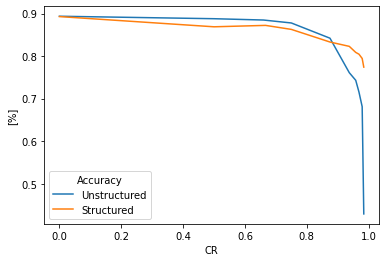

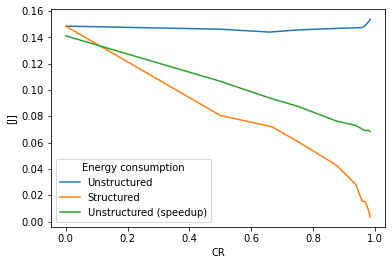

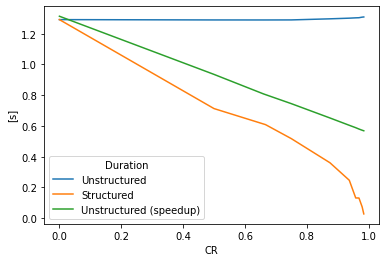

In [63]:
plt.plot(df_unstructured_pruning.CRPercent, df_unstructured_pruning.accuracy)
plt.plot(df_structured_pruning.CRPercent, df_structured_pruning.accuracy)
plt.legend(['Unstructured','Structured'], title = "Accuracy")
plt.xlabel("CR")
plt.ylabel("[%]")
plt.show()
plt.plot(df_unstructured_pruning.CRPercent, df_unstructured_pruning.energyJoule)
plt.plot(df_structured_pruning.CRPercent, df_structured_pruning.energyJoule)
plt.plot(df_unstructured_pruning_speedup.CRPercent, df_unstructured_pruning_speedup.energyJoule)
plt.legend(['Unstructured','Structured', 'Unstructured (speedup)'], title = "Energy consumption")
plt.xlabel("CR")
plt.ylabel("[J]")
plt.show()
plt.plot(df_unstructured_pruning.CRPercent, df_unstructured_pruning.duration)
plt.plot(df_structured_pruning.CRPercent, df_structured_pruning.duration)
plt.plot(df_unstructured_pruning_speedup.CRPercent, df_unstructured_pruning_speedup.duration)
plt.legend(['Unstructured','Structured', 'Unstructured (speedup)'], title = "Duration")
plt.xlabel("CR")
plt.ylabel("[s]")
plt.show()

## Correlations

In [82]:
def calcAndPrintLinReg(df):
    model = LinearRegression().fit(df.CRPercent.to_numpy().reshape(-1, 1) * 100, df.accuracy * 100)
    print("Accuracy(CR):")
    print(f"  intercept: {model.intercept_}")
    print(f"  slope: {model.coef_}")
    print(f"  {model.coef_[0]} * x + {model.intercept_}")

    model = LinearRegression().fit(df.CRPercent.to_numpy().reshape(-1, 1) * 100, df.energyJoule * 1000)
    print("EnergyConsumption(CR):")
    print(f"  intercept: {model.intercept_}")
    print(f"  slope: {model.coef_}")
    print(f"  {model.coef_[0]} * x + {model.intercept_}")

    model = LinearRegression().fit(df.CRPercent.to_numpy().reshape(-1, 1) * 100, df.duration)
    print("Duration(CR):")
    print(f"  intercept: {model.intercept_}")
    print(f"  slope: {model.coef_}")
    print(f"  {model.coef_[0]} * x + {model.intercept_}")

    model = LinearRegression().fit(df.accuracy.to_numpy().reshape(-1, 1) * 100, df.energyJoule * 1000)
    print("EnergyConsumption(accuracy):")
    print(f"  intercept: {model.intercept_}")
    print(f"  slope: {model.coef_}")
    print(f"  {model.coef_[0]} * x + {model.intercept_}")


### Unstructured pruning

In [80]:
calcAndPrintLinReg(df_unstructured_pruning)

Accuracy(CR):
  intercept: 98.17414591711606
  slope: [-0.27599896]
  -0.2759989580917252 * x + 98.17414591711606
EnergyConsumption(CR):
  intercept: 146.00269821795973
  slope: [0.02783765]
  0.02783764774833737 * x + 146.00269821795973
Duration(CR):
  intercept: 1.2849679623983605
  slope: [0.00017268]
  0.00017268061321694495 * x + 1.2849679623983605
EnergyConsumption(accuracy):
  intercept: 161.68249152858806
  slope: [-0.17574037]
  -0.17574036894461204 * x + 161.68249152858806


In [ ]:
df_unstructured_with_baseline_corr = df_unstructured_pruning[["CRPercent", "energyJoule", "duration", "loss", "accuracy"]].corr(method="pearson")
df_unstructured_with_baseline_corr.to_csv(path_or_buf="../../../src/mnist/train/models/unstructured_pruning/inference_corr.csv", sep=';')
save_corr_as_tex(df_unstructured_with_baseline_corr, "../../../src/mnist/train/models/unstructured_pruning/inference_corr.tex")
df_unstructured_with_baseline_corr.head()

### Structured pruning

In [83]:
calcAndPrintLinReg(df_structured_pruning)

Accuracy(CR):
  intercept: 91.40116969225612
  slope: [-0.10571377]
  -0.10571377448198743 * x + 91.40116969225612
EnergyConsumption(CR):
  intercept: 154.3812523752275
  slope: [-1.40067207]
  -1.400672070384814 * x + 154.3812523752275
Duration(CR):
  intercept: 1.3418718053643481
  slope: [-0.0122261]
  -0.012226102402594318 * x + 1.3418718053643481
EnergyConsumption(accuracy):
  intercept: -835.9252801064897
  slope: [10.60132742]
  10.60132742373896 * x + -835.9252801064897


In [ ]:
df_structured_with_baseline_corr = df_structured_pruning[["CRPercent", "energyJoule", "duration", "loss", "accuracy"]].corr(method="pearson")
df_structured_with_baseline_corr.to_csv(path_or_buf="../../../src/mnist/train/models/structured_pruning/inference_corr.csv", sep=';')
save_corr_as_tex(df_structured_with_baseline_corr, "../../../src/mnist/train/models/structured_pruning/inference_corr.tex")
df_structured_with_baseline_corr.head()

### Unstructured pruning (speedup)

In [ ]:
df_unstructured_with_baseline_speedup_corr = df_unstructured_pruning_speedup[["CRPercent", "energyJoule", "duration", "loss", "accuracy"]].corr(method="pearson")
df_unstructured_with_baseline_speedup_corr.to_csv(path_or_buf="../../../src/mnist/train/models/unstructured_pruning/inference_speedup_corr.csv", sep=';')
save_corr_as_tex(df_unstructured_with_baseline_speedup_corr, "../../../src/mnist/train/models/unstructured_pruning/inference_speedup_corr.tex")
df_unstructured_with_baseline_speedup_corr.head()

In [32]:
df = df_unstructured_pruning
df_latex = df[["CRPercent", "loss", "accuracy", "size", "parameters", "duration", "energyJoule"]].copy()
df_latex.loc[:,'CRPercent'] *= 100
df_latex.loc[:,'accuracy'] *= 100
df_latex["duration"] = df_latex["duration"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + " ($\sigma$=" + df["durationStd"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + ")"
df_latex["energyJoule"] = df_latex["energyJoule"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + " ($\sigma$=" + df["energyJouleStd"].apply(lambda x: '{0:.2f}'.format(x * 1000)) + ")"
df_latex.to_latex(buf="test.tex", index=None, header=["CR [\%]", "Loss", "Accuracy [\%]", "Size [Bytes]", "Parameters", "Duration [ms]", "Energy [mJ]"], float_format=lambda x: '%10.2f' % x, escape=False)

df_latex.head(10)

,CRPercent,loss,accuracy,size,parameters,duration,energyJoule
0,0.000000,0.326687,89.370000,446468,110742,1291.58 ($\sigma$=0.80),148.60 ($\sigma$=0.76)
1,50.000000,0.342908,88.789999,446508,110742,1289.46 ($\sigma$=0.32),146.28 ($\sigma$=0.67)
2,66.000000,0.331814,88.480002,446508,110742,1289.30 ($\sigma$=0.46),144.07 ($\sigma$=1.22)
3,75.000000,0.345123,87.790000,446508,110742,1289.60 ($\sigma$=0.75),145.73 ($\sigma$=1.57)
4,87.500000,0.450463,84.210002,446508,110742,1296.73 ($\sigma$=2.83),146.87 ($\sigma$=1.38)
5,93.750000,0.630034,76.099998,446508,110742,1300.99 ($\sigma$=3.28),147.34 ($\sigma$=1.48)
6,95.833333,0.700210,74.309999,446508,110742,1303.15 ($\sigma$=2.56),147.49 ($\sigma$=0.94)
7,96.875000,0.833652,71.560001,446508,110742,1303.92 ($\sigma$=2.52),149.06 ($\sigma$=1.92)
8,97.916667,1.061280,68.110001,446508,110742,1307.65 ($\sigma$=1.32),151.94 ($\sigma$=0.72)
9,98.437500,1.658239,42.899999,446508,110742,1308.75 ($\sigma$=1.44),153.84 ($\sigma$=1.49)
